## Case Study 1(House Prices)

Data fields
Here's a brief version of what you'll find in the data description file.

    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale

### 1.1 import some necessary librairies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1.2 import and put the train and test datasets in  pandas dataframe

In [2]:
train=pd.read_csv('train.csv')

In [3]:
test=pd.read_csv('test.csv')

### 1.3 display the first five rows of the train dataset.

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1.4 display the first five rows of the test dataset.

In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### 1.5 check the numbers of samples and features

In [6]:
train.shape

(1460, 81)

In [7]:
test.shape

(1459, 80)

### 1.6 Save the 'Id' column

In [8]:
train_id=train['Id']
train_id

0          1
1          2
2          3
3          4
4          5
        ... 
1455    1456
1456    1457
1457    1458
1458    1459
1459    1460
Name: Id, Length: 1460, dtype: int64

In [9]:
test_id=test['Id']
test_id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

### 1.7 Now drop the  'Id' colum since it's unnecessary for  the prediction process.

In [10]:
train.drop('Id',axis=1,inplace=True)

In [11]:
test.drop('Id',axis=1,inplace=True)

### 1.8 check again the data size after dropping the 'Id' variable

In [12]:
train.shape

#column reduced to 80

(1460, 80)

In [13]:
test.shape

#column reduced to 79

(1459, 79)

## 1.9 Data Processing

### 1.9a) Check the Outliers for  train['GrLivArea'],  train['SalePrice']. And your observation?

In [32]:
# create subplots 

#create scatter plots for train['GrLivArea'],  train['SalePrice'] 


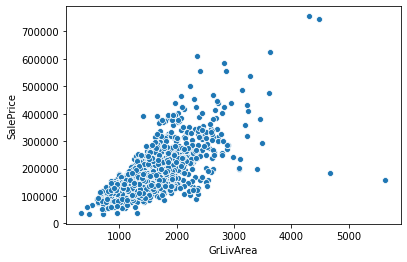

In [17]:
#as they have asked to do scatter plot so did it 
sns.scatterplot(x=train['GrLivArea'],y=train['SalePrice'])
plt.show()

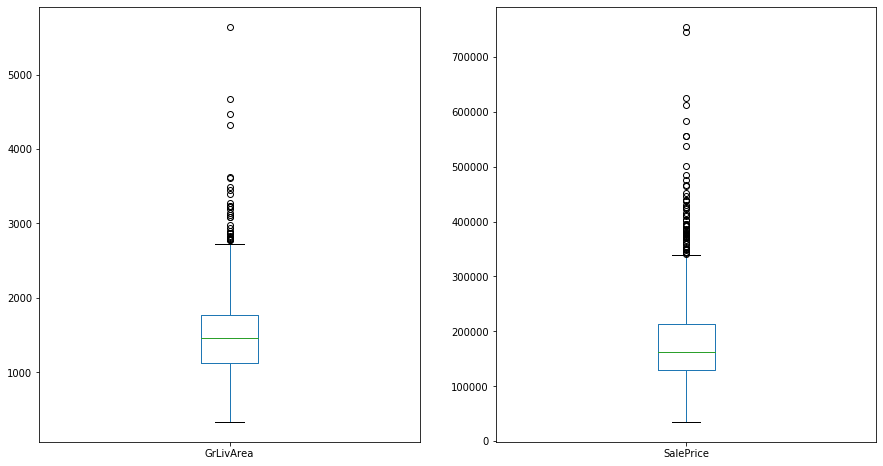

In [16]:
# But Best method to check Outliers is Box

fig,axes=plt.subplots(1,2,figsize=(15,8))
train['GrLivArea'].plot(kind='box',ax=axes[0])
train['SalePrice'].plot(kind='box',ax=axes[1])
plt.show()

#### observation:


### 1.9 b) Deleting outliers.And your observation?

In [ ]:
#outliers with respect to GrlivArea

#Target variables is where we usually remove the outliers

In [18]:
from scipy.stats import zscore

In [19]:
train['GrLivArea_NoOutliers']=zscore(train['GrLivArea'])


In [20]:
train[train['GrLivArea_NoOutliers']< -3].count()

MSSubClass              0
MSZoning                0
LotFrontage             0
LotArea                 0
Street                  0
                       ..
YrSold                  0
SaleType                0
SaleCondition           0
SalePrice               0
GrLivArea_NoOutliers    0
Length: 81, dtype: int64

In [21]:
train[train['GrLivArea_NoOutliers']>3].count()
#16 outliers

MSSubClass              16
MSZoning                16
LotFrontage             14
LotArea                 16
Street                  16
                        ..
YrSold                  16
SaleType                16
SaleCondition           16
SalePrice               16
GrLivArea_NoOutliers    16
Length: 81, dtype: int64

In [22]:
df_train= train[train['GrLivArea_NoOutliers']<3]

In [23]:
train.shape

(1460, 81)

In [24]:
df_train
#16 less rows which means outliers are removed

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GrLivArea_NoOutliers
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0.370333
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,-0.482512
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,0.515013
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,0.383659
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1.299326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,0.250402
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,1.061367
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,1.569647
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,-0.832788


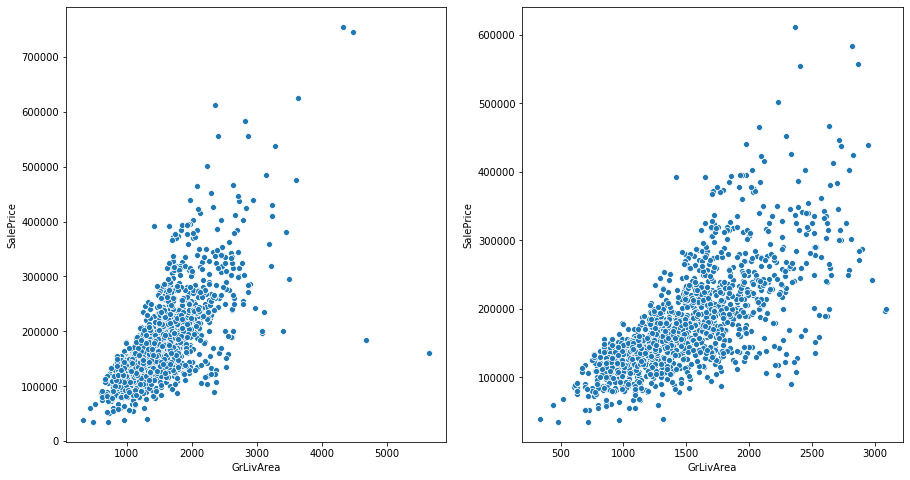

In [25]:
fig,axes=plt.subplots(1,2,figsize=(15,8))
sns.scatterplot(x=train['GrLivArea'],y=train['SalePrice'],ax=axes[0])
sns.scatterplot(x=df_train['GrLivArea'],y=df_train['SalePrice'],ax=axes[1])
plt.show()

#### observation:
  

### 1.9 c)Check the Outliers in box plot  for train['GrLivArea'].And your observation?

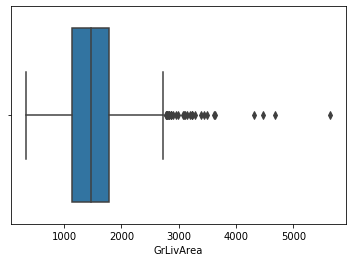

In [26]:
#old data
sns.boxplot(train['GrLivArea'])
plt.show()

### 1.9 d)Check Again the Outliers in box plot  for train['GrLivArea'].And your observation?

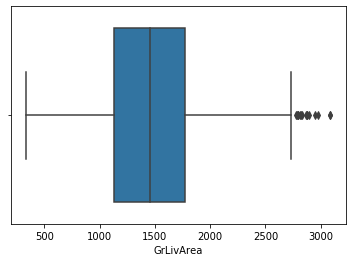

In [27]:
#new data
sns.boxplot(df_train['GrLivArea'])
plt.show()

## 1.10 Checking the skeweness for saleprice.And your observation?

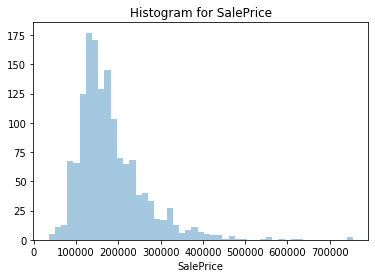

Mean for the SalePrice 180921.19589041095
Median for the SalePrice 163000.0
Mode for the SalePrice 140000
Standard Deviation for the SalePrice 79442.50288288663


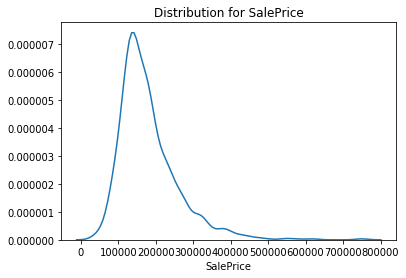

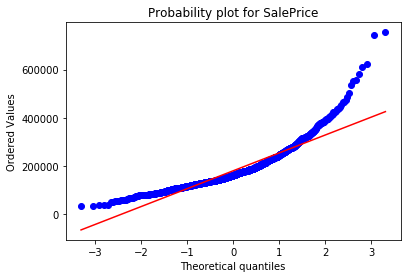

In [28]:
# create histogram for saleprice
sns.distplot(train['SalePrice'],kde=False)
plt.title('Histogram for SalePrice')
plt.show()


# Get the fitted parameters used by the function

print('Mean for the SalePrice',train['SalePrice'].mean())
print('Median for the SalePrice',train['SalePrice'].median())
print('Mode for the SalePrice',train['SalePrice'].mode()[0])
print('Standard Deviation for the SalePrice',train['SalePrice'].std())


#Now plot the distribution

sns.distplot(train['SalePrice'],hist=False)
plt.title('Distribution for SalePrice')
plt.show()

#Get also the QQ-plot

from scipy.stats import probplot
probplot(train['SalePrice'],plot=plt)
plt.title('Probability plot for SalePrice')
plt.show()

### observation:


### 1.10 a) Apply Log-transformation of the target variable.And your observation?

In [0]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column - np.log1p(x)
#Doing it For created new data

In [29]:
train['SalePrice_LogValues']=train['SalePrice'].apply(lambda x: np.log1p(x))

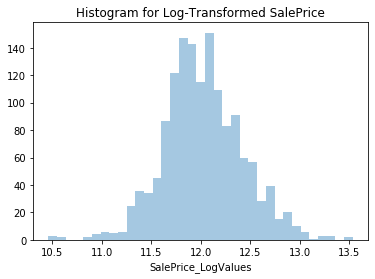

Mean for the SalePrice 12.024057394918371
Median for the SalePrice 12.001511614739405
Mode for the SalePrice 11.849404844423074
Standard Deviation for the SalePrice 0.3994492733225068


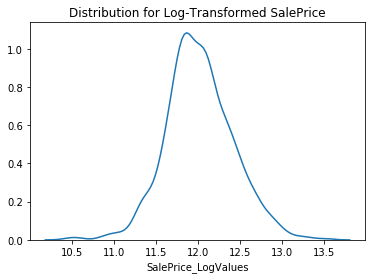

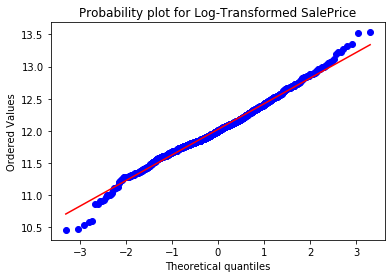

In [30]:
# create histogram for saleprice
sns.distplot(train['SalePrice_LogValues'],kde=False)
plt.title('Histogram for Log-Transformed SalePrice')
plt.show()


# Get the fitted parameters used by the function

print('Mean for the SalePrice',train['SalePrice_LogValues'].mean())
print('Median for the SalePrice',train['SalePrice_LogValues'].median())
print('Mode for the SalePrice',train['SalePrice_LogValues'].mode()[0])
print('Standard Deviation for the SalePrice',train['SalePrice_LogValues'].std())


#Now plot the distribution

sns.distplot(train['SalePrice_LogValues'],hist=False)
plt.title('Distribution for Log-Transformed SalePrice')
plt.show()

#Get also the QQ-plot

from scipy.stats import probplot
probplot(train['SalePrice_LogValues'],plot=plt)
plt.title('Probability plot for Log-Transformed SalePrice')
plt.show()

#### observation:


### 1.11 concatenate the train and test data in the same dataframe

In [44]:
#all_data = pd.concat
all_data=pd.concat([train,test],ignore_index=True)

In [45]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GrLivArea_NoOutliers,SalePrice_LogValues
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,2,2008,WD,Normal,208500.0,0.370333,12.247699
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,0,5,2007,WD,Normal,181500.0,-0.482512,12.109016
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,0,9,2008,WD,Normal,223500.0,0.515013,12.317171
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,0.383659,11.849405
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,0,12,2008,WD,Normal,250000.0,1.299326,12.429220


In [46]:
all_data.shape

(2919, 82)

In [47]:
all_data.drop('SalePrice',axis=1,inplace=True)

In [48]:
all_data.shape

(2919, 81)

### 1.12 Cecking the all Missing Data?

In [49]:
all_data.isna().sum()

MSSubClass                 0
MSZoning                   4
LotFrontage              486
LotArea                    0
Street                     0
                        ... 
YrSold                     0
SaleType                   1
SaleCondition              0
GrLivArea_NoOutliers    1459
SalePrice_LogValues     1459
Length: 81, dtype: int64

### 1.13 plot the missing values using barplot?

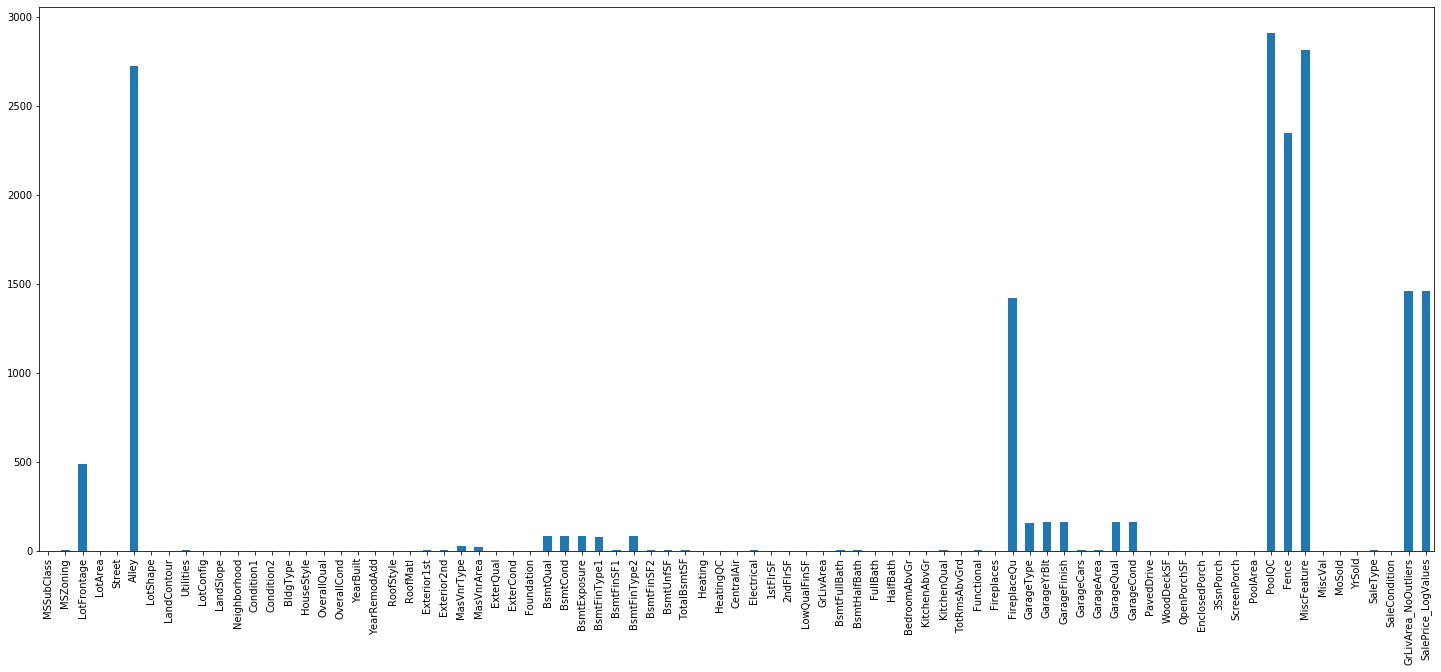

In [50]:
#create subplots

#create barplot for all missing values
plt.figure(figsize=(25,10))
all_data.isnull().sum().plot(kind='bar')
plt.show()


### 1.14 check the Data Correlation using heatmap.And your observation?

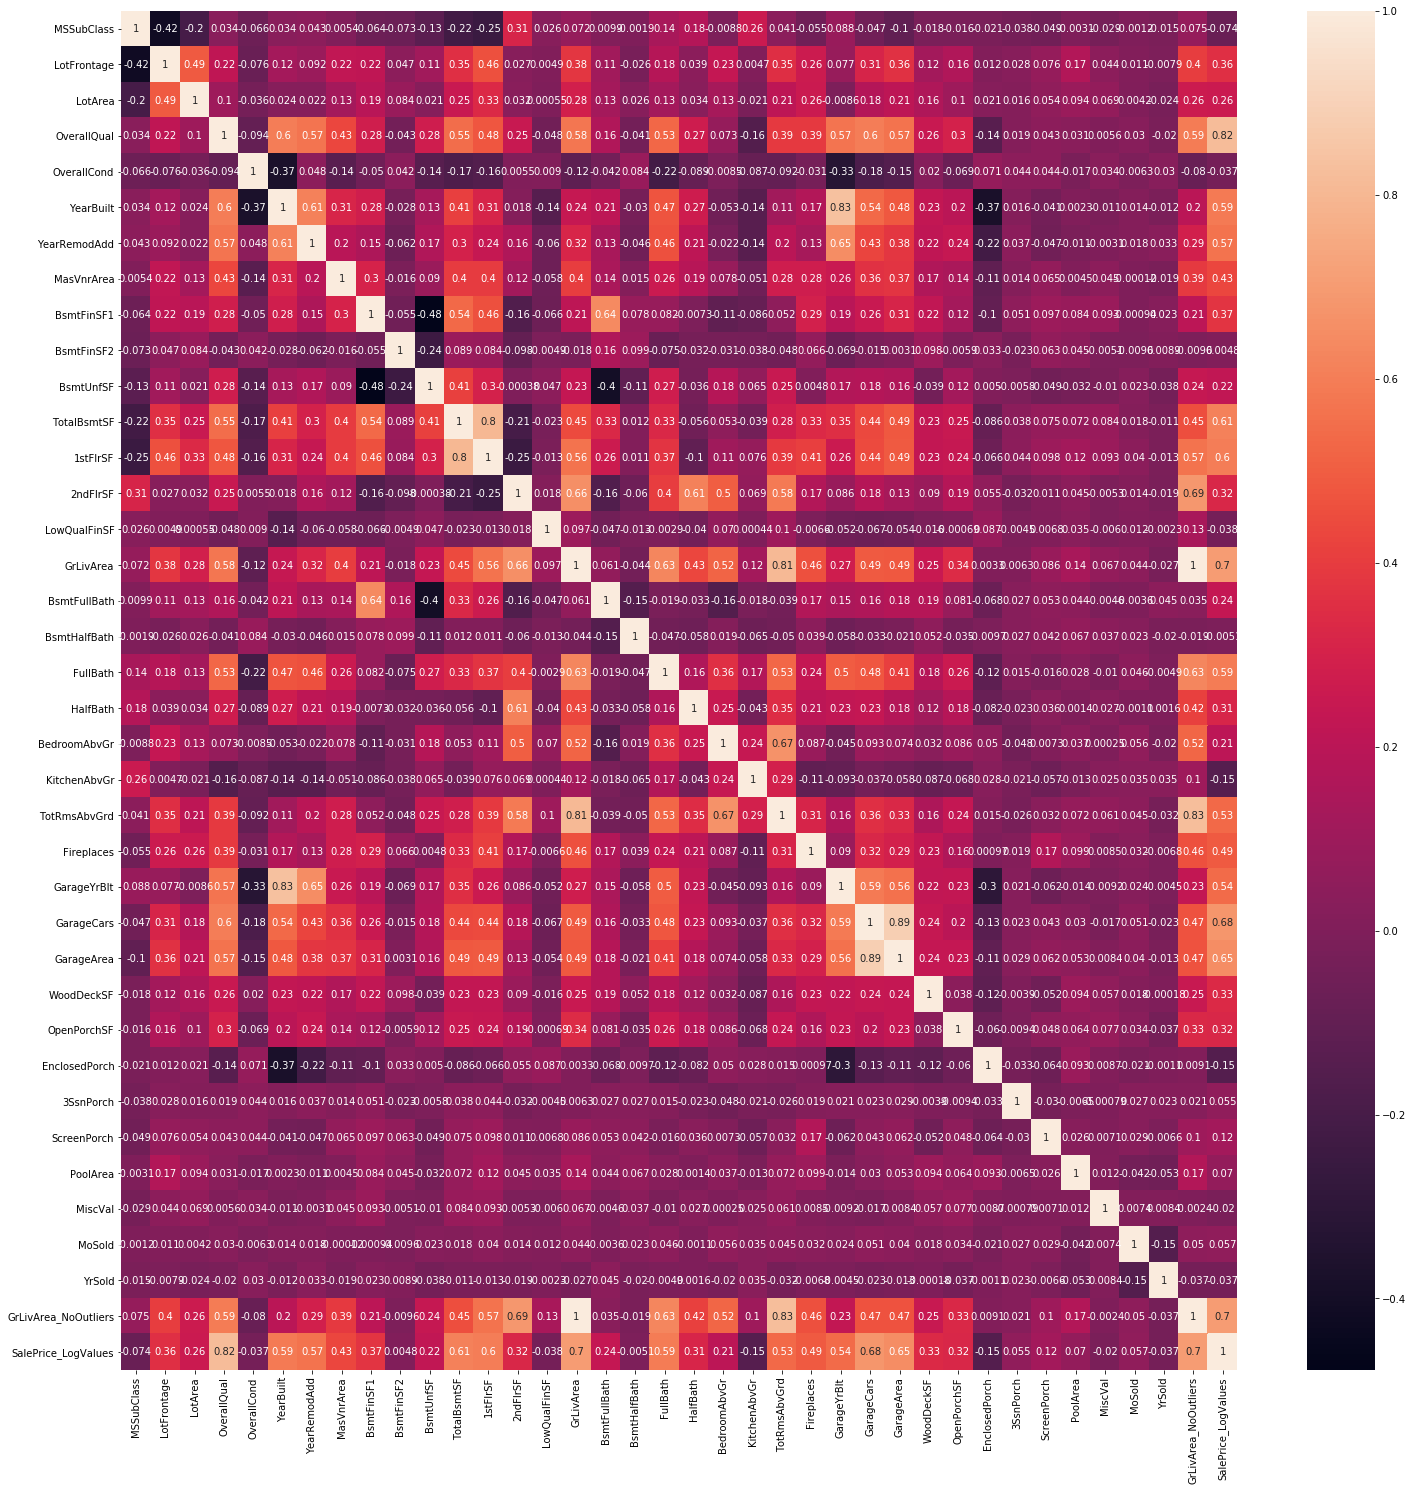

In [51]:
#Correlation map to see how features are correlated with SalePrice

#we have dropped so should we use this only ???

plt.figure(figsize=(25,25))
sns.heatmap(all_data.corr(),annot=True)
plt.show()

In [56]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [66]:
train.corr()['SalePrice']

MSSubClass             -0.084284
LotFrontage             0.351799
LotArea                 0.263843
OverallQual             0.790982
OverallCond            -0.077856
YearBuilt               0.522897
YearRemodAdd            0.507101
MasVnrArea              0.477493
BsmtFinSF1              0.386420
BsmtFinSF2             -0.011378
BsmtUnfSF               0.214479
TotalBsmtSF             0.613581
1stFlrSF                0.605852
2ndFlrSF                0.319334
LowQualFinSF           -0.025606
GrLivArea               0.708624
BsmtFullBath            0.227122
BsmtHalfBath           -0.016844
FullBath                0.560664
HalfBath                0.284108
BedroomAbvGr            0.168213
KitchenAbvGr           -0.135907
TotRmsAbvGrd            0.533723
Fireplaces              0.466929
GarageYrBlt             0.486362
GarageCars              0.640409
GarageArea              0.623431
WoodDeckSF              0.324413
OpenPorchSF             0.315856
EnclosedPorch          -0.128578
3SsnPorch 

#### observation:
   

#### 1.15 Imputing missing values

#### PoolQC : 
data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.

In [67]:
all_data['PoolQC'].isna().sum()

2909

In [68]:
all_data['PoolQC'].fillna('No Pool',inplace=True)

In [69]:
all_data['PoolQC'].isna().sum()

0

#### MiscFeature : 
data description says NA means "no misc feature"

In [70]:
all_data['MiscFeature'].isna().sum()

2814

In [33]:
all_data['MiscFeature'].fillna('No Misc Feature ',inplace=True)

In [34]:
all_data['MiscFeature'].isna().sum()

0

#### Alley : 
data description says NA means "no alley access"

In [35]:
all_data['Alley'].isna().sum()

2721

In [71]:
all_data['Alley'].fillna('No Alley Access',inplace=True)

In [72]:
all_data['Alley'].isna().sum()

0

Fence : 
data description says NA means "no fence"

In [38]:
all_data['Fence'].isna().sum()

2348

In [39]:
all_data['Fence'].fillna('No Fence',inplace=True)

In [40]:
all_data['Fence'].isna().sum()

0

### 1.16 Check remaining missing values if any 

In [73]:
# FireplaceQu : data description says NA means "no fireplace"
all_data['FireplaceQu'].fillna('no fireplace',inplace=True)

In [74]:
all_data['FireplaceQu'].isna().sum()

0

In [75]:
#LotFrontage : Since the area of each street connected to the house property most likely have a similar
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data['LotFrontage'].isna().sum()

486

In [76]:
all_data.groupby('Neighborhood').median()['LotFrontage']

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    51.0
ClearCr    80.5
CollgCr    70.0
Crawfor    70.0
Edwards    65.0
Gilbert    64.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    74.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    89.0
NridgHt    92.0
OldTown    60.0
SWISU      60.0
Sawyer     72.0
SawyerW    67.0
Somerst    72.5
StoneBr    60.0
Timber     82.0
Veenker    80.0
Name: LotFrontage, dtype: float64

In [45]:
#all_data['LotFrontage'].fillna(all_data.groupby('Neighborhood').median()['LotFrontage'],inplace=True)
#all_data['LotFrontage'].fillna(all_data.groupby('Neighborhood').median()['LotFrontage']) - wont work as grouped use transf

In [77]:
all_data['LotFrontage'].fillna(all_data.groupby('Neighborhood')['LotFrontage'].transform(np.median),inplace=True)

In [78]:
all_data['LotFrontage'].isna().sum()

0

In [79]:
# GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
all_data[['GarageType','GarageFinish','GarageQual','GarageCond']].isna().sum()

GarageType      157
GarageFinish    159
GarageQual      159
GarageCond      159
dtype: int64

In [80]:
#all_data[['GarageType','GarageFinish','GarageQual','GarageCond']].applymap(lambda x:None if x==np.nan else x)
lst=['GarageType','GarageFinish','GarageQual','GarageCond']

for i in lst:
    all_data[i].fillna('None',inplace=True)
    

In [81]:
all_data[['GarageType','GarageFinish','GarageQual','GarageCond']].isna().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [51]:
#Correct method too. can be done directly like this.
all_data[['GarageType','GarageFinish','GarageQual','GarageCond']]=all_data[['GarageType','GarageFinish','GarageQual','GarageCond']].fillna('None')

In [82]:
# GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
all_data[['GarageYrBlt','GarageArea','GarageCars']].isna().sum()

GarageYrBlt    159
GarageArea       1
GarageCars       1
dtype: int64

In [83]:
lst=['GarageYrBlt','GarageArea','GarageCars']
for i in lst:
    all_data[i].fillna(0,inplace=True)

In [84]:
all_data[['GarageYrBlt','GarageArea','GarageCars']].isna().sum()

GarageYrBlt    0
GarageArea     0
GarageCars     0
dtype: int64

In [85]:
## BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
all_data[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']].isna().sum()

BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
dtype: int64

In [86]:
lst=['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']
for i in lst:
    all_data[i].fillna(0,inplace=True)

In [87]:
all_data[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']].isna().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

In [88]:
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.
all_data[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].isna().sum()

BsmtQual        81
BsmtCond        82
BsmtExposure    82
BsmtFinType1    79
BsmtFinType2    80
dtype: int64

In [89]:
cols=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']

for i in cols:
    all_data[i].fillna('No',inplace=True)


In [90]:
all_data[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].isna().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

In [91]:
#MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
all_data['MasVnrArea'].isna().sum()

23

In [92]:
all_data['MasVnrArea'].fillna(0,inplace=True)

In [93]:
all_data['MasVnrArea'].isna().sum()

0

In [94]:
all_data['MasVnrType'].isna().sum()

24

In [95]:
all_data['MasVnrType'].fillna('None',inplace=True)

In [96]:
all_data['MasVnrType'].isna().sum()

0

In [97]:
#MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
all_data['MSZoning'].isna().sum()

4

In [98]:
all_data['MSZoning'].fillna('RL',inplace=True)

In [99]:
all_data['MSZoning'].isna().sum()

0

In [100]:
#Functional : data description says NA means typical
all_data['Functional'].isna().sum()

2

In [101]:
all_data['Functional'].fillna('typical',inplace=True)

In [102]:
all_data['Functional'].isna().sum()

0

In [103]:
#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
all_data['Electrical'].fillna('SBrkr',inplace=True)

In [104]:
all_data['Electrical'].isna().sum()

0

In [105]:
#KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
all_data['KitchenQual'].fillna('TA',inplace=True)

In [106]:
all_data['KitchenQual'].isna().sum()

0

In [109]:
#Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
all_data['Exterior1st'].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
Stone         2
AsphShn       2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [110]:
all_data['Exterior2nd'].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [111]:
all_data['Exterior1st'].isna().sum()

1

In [112]:
all_data['Exterior1st'].fillna('VinylSd',inplace=True)

In [113]:
all_data['Exterior1st'].isna().sum()

0

In [114]:
all_data['Exterior2nd'].isna().sum()

1

In [115]:
all_data['Exterior2nd'].fillna('VinylSd',inplace=True)

In [116]:
all_data['Exterior2nd'].isna().sum()

0

In [117]:
#SaleType : Fill in again with most frequent which is "WD"
all_data['SaleType'].fillna('WD',inplace=True)

In [118]:
all_data['SaleType'].isna().sum()

0

In [0]:
#MSSubClass : Na most likely means No building class. We can replace missing values with None

In [119]:
all_data['MSSubClass'].fillna('None',inplace=True)

In [120]:
all_data['MSSubClass'].isna().sum()

0

### 1.17 Check again remaining missing values if any.And your observation?

In [121]:
#for entire data set after replacing
all_data.isna().sum()

MSSubClass                 0
MSZoning                   0
LotFrontage                0
LotArea                    0
Street                     0
                        ... 
YrSold                     0
SaleType                   0
SaleCondition              0
GrLivArea_NoOutliers    1459
SalePrice_LogValues     1459
Length: 81, dtype: int64

In [122]:
#Not able to see all so used for loop.
for i in all_data.columns:
    print(i, all_data[i].isna().sum())

MSSubClass 0
MSZoning 0
LotFrontage 0
LotArea 0
Street 0
Alley 0
LotShape 0
LandContour 0
Utilities 2
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 0
MasVnrArea 0
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 0
BsmtCond 0
BsmtExposure 0
BsmtFinType1 0
BsmtFinSF1 0
BsmtFinType2 0
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 0
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 0
GarageType 0
GarageYrBlt 0
GarageFinish 0
GarageCars 0
GarageArea 0
GarageQual 0
GarageCond 0
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 0
Fence 2348
MiscFeature 2814
MiscVal 0
MoSold 0
YrSold 0
SaleType 0
SaleCondit

#### observation:
    

# 1.18 features engineering

#### 1.18 a) Transforming some numerical variables that are really categorical

In [123]:
#MSSubClass=The building class
#Didnt mention which class so lets assume
all_data['MSSubClass_Categorical']= pd.cut(all_data['MSSubClass'],3,labels=['Low','Middle','High'])

#Changing OverallCond into a categorical variable
all_data['OverallCond_Categorical']=pd.cut(all_data['OverallCond'],3,labels=['Low','Middle','High'])


#Year and month sold are transformed into categorical features.

all_data['YrSold_Categorical']=pd.cut(all_data['YrSold'],[0,2006, 2007, 2008, 2009, 2010],labels=['Sold in 2006','Sold in 2007','Sold in 2008','Sold in 2009','Sold in 2010'])

all_data['MoSold_category']=pd.cut(train['MoSold'],[0,1,2,3,4,5,6,7,8,9,10,11,12],labels=['Jan','Feb','March','April','May','June','July','August','Sept','Oct','Nov','Dec'])


In [124]:
all_data['MoSold'].value_counts()


6     503
7     446
5     394
4     279
8     233
3     232
10    173
9     158
11    142
2     133
1     122
12    104
Name: MoSold, dtype: int64

In [125]:
all_data['MoSold_category'].value_counts()


June      253
July      234
May       204
April     141
August    122
March     106
Oct        89
Nov        79
Sept       63
Dec        59
Jan        58
Feb        52
Name: MoSold_category, dtype: int64

In [126]:
all_data['YrSold'].value_counts()

2007    692
2009    647
2008    622
2006    619
2010    339
Name: YrSold, dtype: int64

In [127]:
all_data['YrSold_Categorical'].value_counts()

Sold in 2007    692
Sold in 2009    647
Sold in 2008    622
Sold in 2006    619
Sold in 2010    339
Name: YrSold_Categorical, dtype: int64

#### 1.8b) label Encoding some categorical variables that may contain information in their ordering set

In [128]:

# process columns, apply LabelEncoder to categorical features
all_data.info()
   
#Before conversion and applying label encoder

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 85 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   MSSubClass               2919 non-null   int64   
 1   MSZoning                 2919 non-null   object  
 2   LotFrontage              2919 non-null   float64 
 3   LotArea                  2919 non-null   int64   
 4   Street                   2919 non-null   object  
 5   Alley                    2919 non-null   object  
 6   LotShape                 2919 non-null   object  
 7   LandContour              2919 non-null   object  
 8   Utilities                2917 non-null   object  
 9   LotConfig                2919 non-null   object  
 10  LandSlope                2919 non-null   object  
 11  Neighborhood             2919 non-null   object  
 12  Condition1               2919 non-null   object  
 13  Condition2               2919 non-null   object  
 14  BldgType

In [131]:
from sklearn.preprocessing import LabelEncoder

In [132]:
LE= LabelEncoder()

In [133]:
Encoding_columns=[i for i in all_data.columns if(all_data[i].dtype==object) ]

In [134]:
print(Encoding_columns)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [135]:
for i in Encoding_columns:
    all_data[i+'_LEcategory']= LE.fit_transform(all_data[i].astype(str))
    

In [136]:
all_data.describe()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType_LEcategory,GarageFinish_LEcategory,GarageQual_LEcategory,GarageCond_LEcategory,PavedDrive_LEcategory,PoolQC_LEcategory,Fence_LEcategory,MiscFeature_LEcategory,SaleType_LEcategory,SaleCondition_LEcategory
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.542994,10168.114080,6.089072,5.564577,1971.312778,1984.264474,101.396026,441.272011,49.565262,...,2.483727,1.874272,4.689620,4.764303,1.830764,2.993148,3.493662,3.923604,7.491264,3.779034
std,42.517628,21.703256,7886.996359,1.409947,1.113131,30.291442,20.894344,178.854579,455.606014,169.179104,...,1.932814,1.202416,0.950235,0.803061,0.537299,0.128073,1.091376,0.405566,1.593502,1.078241
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,5.000000,5.000000,2.000000,3.000000,4.000000,4.000000,8.000000,4.000000
50%,50.000000,70.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,0.000000,...,1.000000,2.000000,5.000000,5.000000,2.000000,3.000000,4.000000,4.000000,8.000000,4.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,0.000000,...,5.000000,3.000000,5.000000,5.000000,2.000000,3.000000,4.000000,4.000000,8.000000,4.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,6.000000,3.000000,5.000000,5.000000,2.000000,3.000000,4.000000,4.000000,8.000000,5.000000


In [137]:
all_data['SaleCondition_LEcategory']


0       4
1       4
2       4
3       0
4       4
       ..
2914    4
2915    0
2916    0
2917    4
2918    4
Name: SaleCondition_LEcategory, Length: 2919, dtype: int32

In [139]:
all_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType_LEcategory,GarageFinish_LEcategory,GarageQual_LEcategory,GarageCond_LEcategory,PavedDrive_LEcategory,PoolQC_LEcategory,Fence_LEcategory,MiscFeature_LEcategory,SaleType_LEcategory,SaleCondition_LEcategory
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.542994,10168.114080,6.089072,5.564577,1971.312778,1984.264474,101.396026,441.272011,49.565262,...,2.483727,1.874272,4.689620,4.764303,1.830764,2.993148,3.493662,3.923604,7.491264,3.779034
std,42.517628,21.703256,7886.996359,1.409947,1.113131,30.291442,20.894344,178.854579,455.606014,169.179104,...,1.932814,1.202416,0.950235,0.803061,0.537299,0.128073,1.091376,0.405566,1.593502,1.078241
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,5.000000,5.000000,2.000000,3.000000,4.000000,4.000000,8.000000,4.000000
50%,50.000000,70.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,0.000000,...,1.000000,2.000000,5.000000,5.000000,2.000000,3.000000,4.000000,4.000000,8.000000,4.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,0.000000,...,5.000000,3.000000,5.000000,5.000000,2.000000,3.000000,4.000000,4.000000,8.000000,4.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,6.000000,3.000000,5.000000,5.000000,2.000000,3.000000,4.000000,4.000000,8.000000,5.000000


### 1.19 Introduction to Test and Train


In [140]:
from sklearn.model_selection import train_test_split

### 1.20 Extract the independent variable X and dependent variable Y?

In [141]:
x=train.drop('SalePrice',axis=1)
x

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GrLivArea_NoOutliers,SalePrice_LogValues
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,0.370333,12.247699
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,-0.482512,12.109016
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,0.515013,12.317171
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,0.383659,11.849405
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,1.299326,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2007,WD,Normal,0.250402,12.072547
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,1.061367,12.254868
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,1.569647,12.493133
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,4,2010,WD,Normal,-0.832788,11.864469


In [142]:
y=train['SalePrice']
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

### 1.21 Split the data into train and test set(70/30)?

In [143]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

# The End